<a href="https://colab.research.google.com/github/doryunnim/machinelearning/blob/ready/raedy_ipyn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. 학습하고자 하는 가설을 수학적 표현식으로 나타낸다.
2. 가설의 성능을 측정할 수 있는 손실 함수를 정의한다.
3. 손실 함수를 최소화 할 수 있는 학습 알고리즘을 설계한다.

In [0]:
import numpy as np
print(np.__version__)

my_arr = np.array([[10, 20, 30], [40, 50, 60]])
print(my_arr)
print(type(my_arr))
print(my_arr[0][2])
print(np.sum(my_arr))
# 마지막 줄은 print() 함수를 사용하지 않아도 자동으로 결과가 출력된다.

1.17.5
[[10 20 30]
 [40 50 60]]
<class 'numpy.ndarray'>
30
210


In [25]:
import tensorflow as tf

# 노드 생성하는 법 (상수)
node1 = tf.constant([3,4,5,6,7,8], shape=[6])

print(node1)

# 임의의 값 노드 생성하는 법
a = tf.placeholder(tf.float32)
b = tf.placeholder(tf.float32)
adder_node = a + b

#더 복잡한 그래프 형태 만들기
add_and_triple = adder_node * 3 # tf.multiply(adder_node, 3) 형태임

# 텐서는 세션을 열어서 그래프를 실행한다
sess = tf.Session()
print(sess.run(node1))

for i in range(5):
  node3 = tf. add(node1[i], node1[i+1])

print(sess.run(node3))

# feed_dict는 그래프에 넣을 값을 Dictionary 형태로 명시하는 것이다.
print(sess.run(adder_node, feed_dict={a: 3, b: 4.5}))
print(sess.run(adder_node, feed_dict={a: [1, 3], b:[2, 4]}))

print(sess.run(add_and_triple, feed_dict={a: 3, b: 4.5}))
sess.close()

Tensor("Const_20:0", shape=(6,), dtype=int32)
[3 4 5 6 7 8]
15
7.5
[3. 7.]
22.5


In [63]:
import tensorflow as tf
import time
from tensorflow.keras.callbacks import TensorBoard

W = tf.Variable(tf.random_normal([1]))
b = tf.Variable(tf.random_normal([1]))
x = tf.placeholder(tf.float32)
linear_model = W*x + b
# True Value => y 
y = tf.placeholder(tf.float32)
# 손실 함수 정의
loss = tf.reduce_mean(tf.square(linear_model - y)) # mean{(y^ - y)^2}

tf.summary.scalar('loss', loss)

optimizer = tf.train.GradientDescentOptimizer(0.01)
train_step = optimizer.minimize(loss)

x_train = [1, 2, 3, 4]
y_train = [6, 12, 18, 24]

sess = tf.Session()
sess.run(tf.global_variables_initializer())

for i in range(1000):
  sess.run(train_step, feed_dict={x: x_train, y: y_train})

x_test = [3.5, 5, 5.5, 6]

print(sess.run(linear_model, feed_dict={x: x_test}))

sess.close()

[20.988756 29.95863  32.94859  35.93855 ]


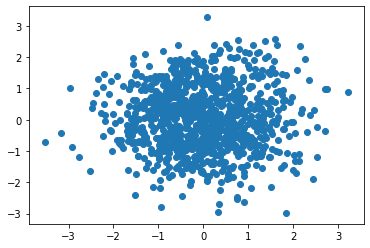

In [0]:
import matplotlib.pyplot as plt

# plt.plot([1, 2, 3, 4, 5], [1, 4, 9, 16 ,25])
# plt.show()

# plt.scatter([1, 2, 3, 4, 5], [1, 4, 9, 16, 25])
# plt.show()

x = np.random.randn(1000)
y = np.random.randn(1000)
plt.scatter(x, y)
plt.show()

선형 회귀는 머신러닝 알고리즘 중 하나입니다.


In [0]:
from sklearn.datasets import load_diabetes
import matplotlib.pyplot as plt
diabetes = load_diabetes()
print(diabetes.data.shape, diabetes.target.shape)
# print(diabetes.data[0:3])

# plt.scatter(diabetes.data[:, 2], diabetes.target)
# plt.xlabel('x')
# plt.ylabel('y')
# plt.show()

x = diabetes.data[:, 2]
y = diabetes.target

w = 1.0
b = 1.0
y_hat = x[0] * w + b
print(y_hat)
print(y[0])
# w에 대한 변화율로 절편 업데이트 하기
w_inc = w + 0.1
y_hat_inc = x[0] * w_inc + b
print(y_hat_inc)

w_rate = (y_hat_inc - y_hat) / (w_inc - w)
print(w_rate)

w_new = w + w_rate
print(w_new)
# b에 대한 변화율로 절편 업데이트 하기
b_inc = b + 0.1
y_hat_inc = x[0] * w + b_inc
print(y_hat_inc)

b_rate = (y_hat_inc - y_hat) / (b_inc - b)
print(b_rate)

b_new = b + 1
print(b_new)
###
err = y[0] - y_hat 
w_new = w + w_rate * err
b_new = b + 1 * err
print(w_new, b_new)

y_hat = x[1] * w_new + b_new
err = y[1] - y_hat
w_rate = x[1]
w_new = w_new + w_rate * err
b_new = b_new + 1 * err
print(w_new, b_new)

for x_i, y_i in zip(x, y):
  y_hat = x_i * w + b
  err = y_i - y_hat
  w_rate = x_i
  w = w + w_rate * err
  b = b + 1 * err
print(w, b)

plt.scatter(x, y)
pt1 = (-0.1, -0.1 * w + b)
pt2 = (0.15, 0.15 * w + b)
plt.plot([pt1[0], pt2[0]], [pt1[1], pt2[1] ] )
plt.show()

(442, 10) (442,)
1.0616962065186886
151.0
1.0678658271705574
0.061696206518688734
1.0616962065186888
1.1616962065186887
1.0
2.0


(442, 10) (442,)
913.5973364345905 123.39414383177204
274.3204238107664


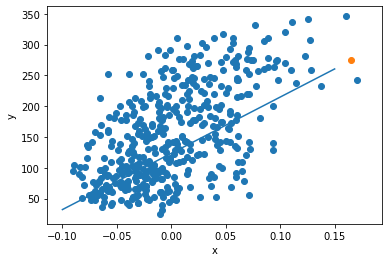

In [0]:
from sklearn.datasets import load_diabetes
import matplotlib.pyplot as plt
diabetes = load_diabetes()
print(diabetes.data.shape, diabetes.target.shape)

x = diabetes.data[:,2]
y = diabetes.target

w = 0.1
b = 0.1

for i in range(1, 100):
  for x_i, y_i in zip(x, y):
    y_hat = x_i * w + b
    err = y_i - y_hat
    w_rate = x_i
    w = w + w_rate * err
    b = b + 1 * err
print(w, b)

x_new = 0.1652
y_pred = x_new * w + b
print(y_pred)

plt.scatter(x, y)
plt.scatter(x_new, y_pred)
pt1 = (-0.1, -0.1 * w + b)
pt2 = (0.15, 0.15 * w + b)
plt.plot([pt1[0], pt2[0]], [pt1[1], pt2[1]])
plt.xlabel('x')
plt.ylabel('y')
plt.show()